# Requirements

In [53]:
# Add as many imports as you need.
!git clone https://github.com/ammitrevska/DataScience.git

Cloning into 'DataScience'...
fatal: could not read Username for 'https://github.com': No such device or address


# Laboratory Exercise - Run Mode (8 points)

## Introduction
In this laboratory assignment, the primary objective is to use Long Short-Term Memory (LSTM) networks for time series forecasting in order to predict the current **mean temperature** in the city of Delhi. To accomplish this use data from the past three days, which includes information such as the **mean temperature**, **humidity**, **wind speed**, and **mean pressure**. The goal is to employ LSTM, a type of recurrent neural network, to effectively forecast the future mean temperature based on the provided historical data.

**Note: You are required to perform this laboratory assignment on your local machine.**

## The Climate Dataset

## Downloading the Climate Dataset

In [ ]:
!gdown 1kczX2FpFTH1QEsDeg6dszXM3Azwyd7XC

## Exploring the Climate Dataset
This dataset consists of daily weather records for the city of Delhi spanning a period of 4 years (from 2013 to 2017). The dataset includes the following attributes:

- date - date in the format YYYY-MM-DD,
- meantemp - mean temperature averaged from multiple 3-hour intervals in a day,
- humidity - humidity value for the day (measured in grams of water vapor per cubic meter volume of air),
- wind_speed - wind speed measured in kilometers per hour, and
- meanpressure - pressure reading of the weather (measured in atm).

*Note: The dataset is complete, with no missing values in any of its entries.*

Load the dataset into a `pandas` data frame.

In [5]:
# Write your code here. Add as many boxes as you need.
import pandas as pd
df = pd.read_csv('/content/climate-data (1).csv')

Explore the dataset using visualizations of your choice.

In [6]:

# Write your code here. Add as many boxes as you need.
df.head(12)

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
5,2013-01-06,7.000000,82.800000,1.480000,1018.000000
6,2013-01-07,7.000000,78.600000,6.300000,1020.000000
7,2013-01-08,8.857143,63.714286,7.142857,1018.714286
8,2013-01-09,14.000000,51.250000,12.500000,1017.000000
9,2013-01-10,11.000000,62.000000,7.400000,1015.666667


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [8]:
df.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

# Visualizations

Plot a time series graph of the mean temperature over the entire period. This will help you visualize the overall trend

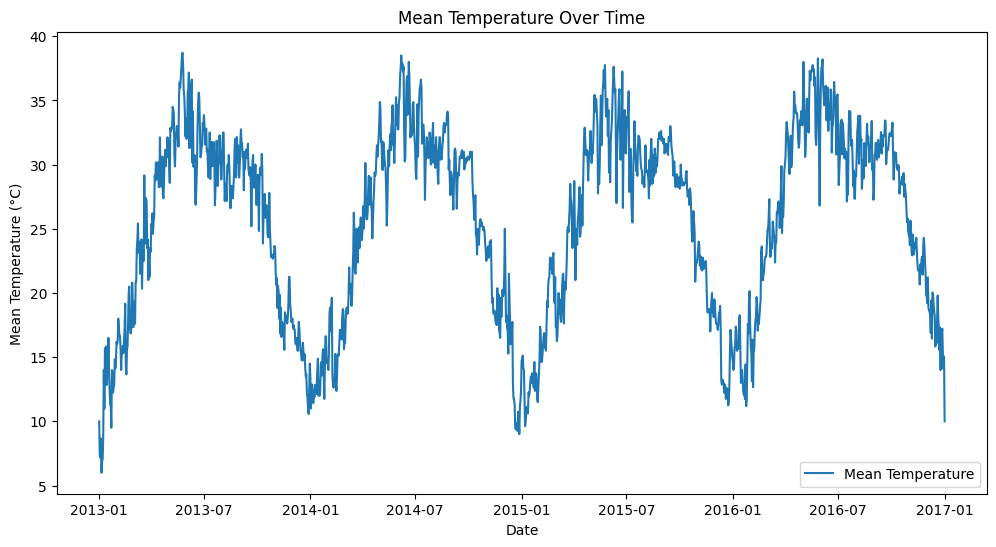

In [9]:
import matplotlib.pyplot as plt

df['date'] = pd.to_datetime(df['date'])

plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['meantemp'], label='Mean Temperature')
plt.title('Mean Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.legend()
plt.show()

Create a heatmap to visualize the correlation between different weather attributes (mean temperature, humidity, wind speed, mean pressure). This can help identify relationships.

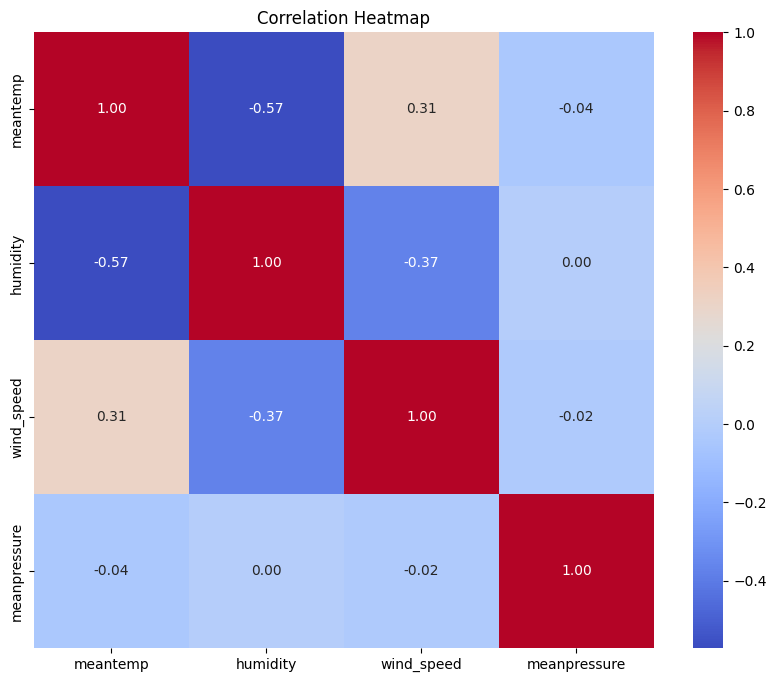

In [10]:
import seaborn as sns

# Calculate correlation matrix
corr_matrix = df[['meantemp', 'humidity', 'wind_speed', 'meanpressure']].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Plot distribution plots for each attribute to understand their respective distributions.

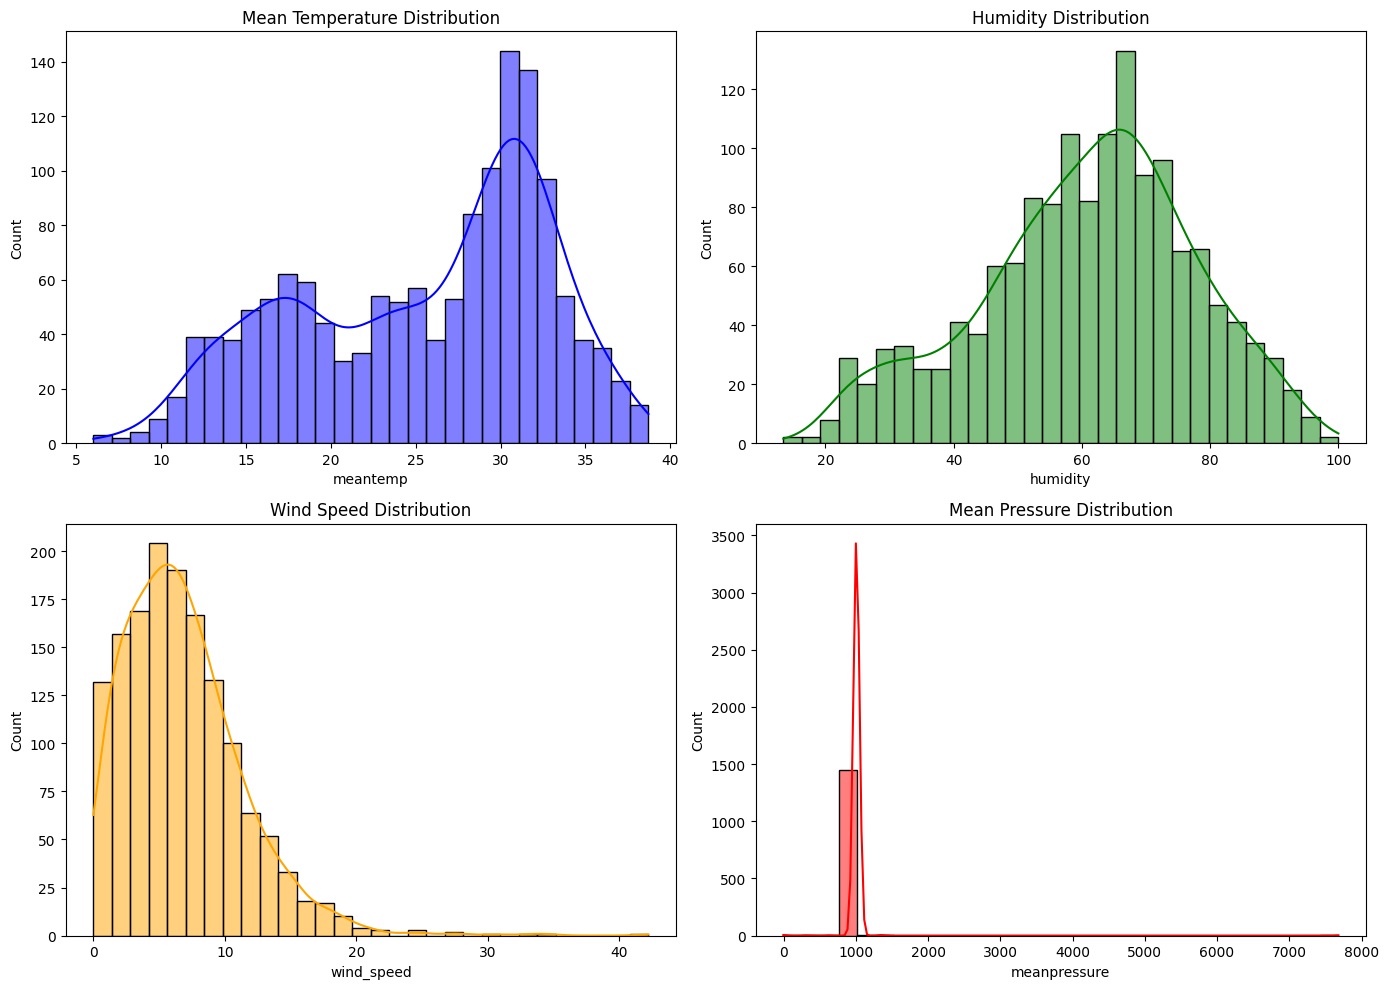

In [11]:
# Distribution plots
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.histplot(df['meantemp'], bins=30, kde=True, color='blue')
plt.title('Mean Temperature Distribution')

plt.subplot(2, 2, 2)
sns.histplot(df['humidity'], bins=30, kde=True, color='green')
plt.title('Humidity Distribution')

plt.subplot(2, 2, 3)
sns.histplot(df['wind_speed'], bins=30, kde=True, color='orange')
plt.title('Wind Speed Distribution')

plt.subplot(2, 2, 4)
sns.histplot(df['meanpressure'], bins=30, kde=True, color='red')
plt.title('Mean Pressure Distribution')

plt.tight_layout()
plt.show()


Create a pair plot to visualize pairwise relationships between different attributes.


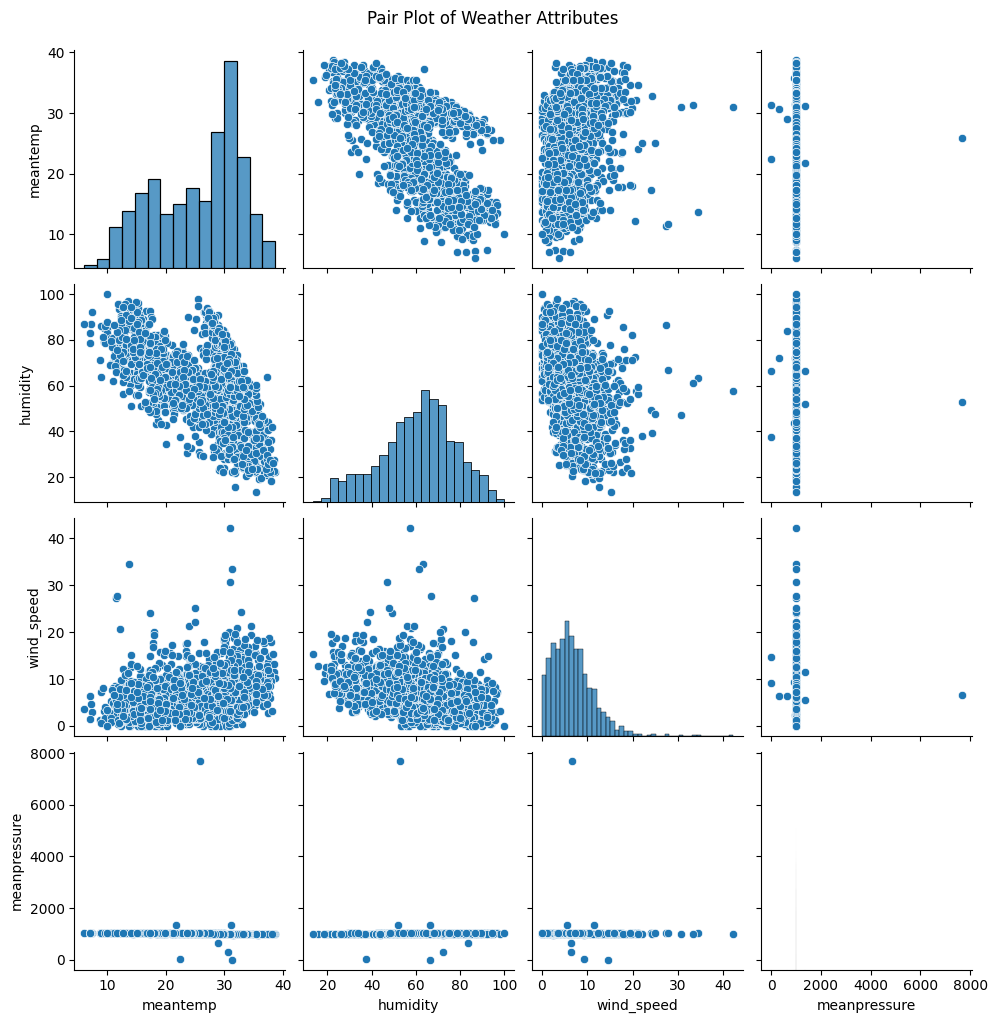

In [12]:
# Pair plot
sns.pairplot(df[['meantemp', 'humidity', 'wind_speed', 'meanpressure']])
plt.suptitle('Pair Plot of Weather Attributes', y=1.02)
plt.show()


## Feauture Extraction
Apply a lag of one, two, and three days to each feature, creating a set of features representing the meteorological conditions from the previous three days. To maintain dataset integrity, eliminate any resulting missing values at the beginning of the dataset.

*Be careful when extracting the features. For each day, ensure that features are obtained sequentially, starting with those from 3 days ago, followed by features from 2 days ago, and finally, features from 1 day ago. This becomes crucial when reshaping the train and test sets later on.*

Hint: Use `df['column_name'].shift(period)`. Check the documentation at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html.

In [16]:
df.columns

Index(['date', 'meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')

In [14]:

# Write your code here. Add as many boxes as you need.
columns = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']

In [15]:
for col in columns:
  for i in range(3,0,-1):
    df[f'{col}_lag{i}'] = df[col].shift(i)

In [16]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure,meantemp_lag3,meantemp_lag2,meantemp_lag1,humidity_lag3,humidity_lag2,humidity_lag1,wind_speed_lag3,wind_speed_lag2,wind_speed_lag1,meanpressure_lag3,meanpressure_lag2,meanpressure_lag1
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,NaN,NaN,10.000000,NaN,NaN,84.500000,NaN,NaN,0.000000,NaN,NaN,1015.666667
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,NaN,10.000000,7.400000,NaN,84.5,92.000000,NaN,0.000000,2.980000,NaN,1015.666667,1017.800000
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,10.0,7.400000,7.166667,84.5,92.0,87.000000,0.00,2.980000,4.633333,1015.666667,1017.800000,1018.666667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,7.4,7.166667,8.666667,92.0,87.0,71.333333,2.98,4.633333,1.233333,1017.800000,1018.666667,1017.166667


In [17]:
df.dropna(inplace=True)

In [18]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure,meantemp_lag3,meantemp_lag2,meantemp_lag1,humidity_lag3,humidity_lag2,humidity_lag1,wind_speed_lag3,wind_speed_lag2,wind_speed_lag1,meanpressure_lag3,meanpressure_lag2,meanpressure_lag1
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,10.000000,7.400000,7.166667,84.500000,92.000000,87.000000,0.000000,2.980000,4.633333,1015.666667,1017.800000,1018.666667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,7.400000,7.166667,8.666667,92.000000,87.000000,71.333333,2.980000,4.633333,1.233333,1017.800000,1018.666667,1017.166667
5,2013-01-06,7.000000,82.800000,1.480000,1018.000000,7.166667,8.666667,6.000000,87.000000,71.333333,86.833333,4.633333,1.233333,3.700000,1018.666667,1017.166667,1016.500000
6,2013-01-07,7.000000,78.600000,6.300000,1020.000000,8.666667,6.000000,7.000000,71.333333,86.833333,82.800000,1.233333,3.700000,1.480000,1017.166667,1016.500000,1018.000000
7,2013-01-08,8.857143,63.714286,7.142857,1018.714286,6.000000,7.000000,7.000000,86.833333,82.800000,78.600000,3.700000,1.480000,6.300000,1016.500000,1018.000000,1020.000000


In [19]:
df.drop(columns=['date', 'humidity', 'wind_speed', 'meanpressure'], inplace=True)

In [20]:
df.head()

,meantemp,meantemp_lag3,meantemp_lag2,meantemp_lag1,humidity_lag3,humidity_lag2,humidity_lag1,wind_speed_lag3,wind_speed_lag2,wind_speed_lag1,meanpressure_lag3,meanpressure_lag2,meanpressure_lag1
3,8.666667,10.000000,7.400000,7.166667,84.500000,92.000000,87.000000,0.000000,2.980000,4.633333,1015.666667,1017.800000,1018.666667
4,6.000000,7.400000,7.166667,8.666667,92.000000,87.000000,71.333333,2.980000,4.633333,1.233333,1017.800000,1018.666667,1017.166667
5,7.000000,7.166667,8.666667,6.000000,87.000000,71.333333,86.833333,4.633333,1.233333,3.700000,1018.666667,1017.166667,1016.500000
6,7.000000,8.666667,6.000000,7.000000,71.333333,86.833333,82.800000,1.233333,3.700000,1.480000,1017.166667,1016.500000,1018.000000
7,8.857143,6.000000,7.000000,7.000000,86.833333,82.800000,78.600000,3.700000,1.480000,6.300000,1016.500000,1018.000000,1020.000000


## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**



In [21]:
# Write your code here. Add as many boxes as you need.
from sklearn.model_selection import train_test_split


In [22]:
X = df.drop(['meantemp'], axis=1 )
Y = df['meantemp']

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 0, shuffle=False)

## Feauture Scaling
Scale the extracted features using an appropriate scaler.

In [24]:
# Write your code here. Add as many boxes as you need.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Feature Reshaping

Reshape the feature dimensions into the shape `(samples, timesteps, features)`

In [25]:
# Write your code here. Add as many boxes as you need.
df.columns

Index(['meantemp', 'meantemp_lag3', 'meantemp_lag2', 'meantemp_lag1',
       'humidity_lag3', 'humidity_lag2', 'humidity_lag1', 'wind_speed_lag3',
       'wind_speed_lag2', 'wind_speed_lag1', 'meanpressure_lag3',
       'meanpressure_lag2', 'meanpressure_lag1'],
      dtype='object')

In [27]:
X_train.shape

(1313, 12)

In [28]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

In [29]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [30]:
X_train.shape

(1313, 12, 1)

## Long Short-Term Memory (LSTM) Network
Build a Long Short-Term Memory (LSTM) Network for forecasting the current **mean temperature** based on the extracted features from the previous three days.

Define the forecasting model using the **Keras Sequential API** (`keras.models.Sequential`), incorporating one or more LSTM layers along with additional relevant layers (`keras.layers`). Be cautious when specifying the configuration of the final layer to ensure proper model output for the forecasting task.

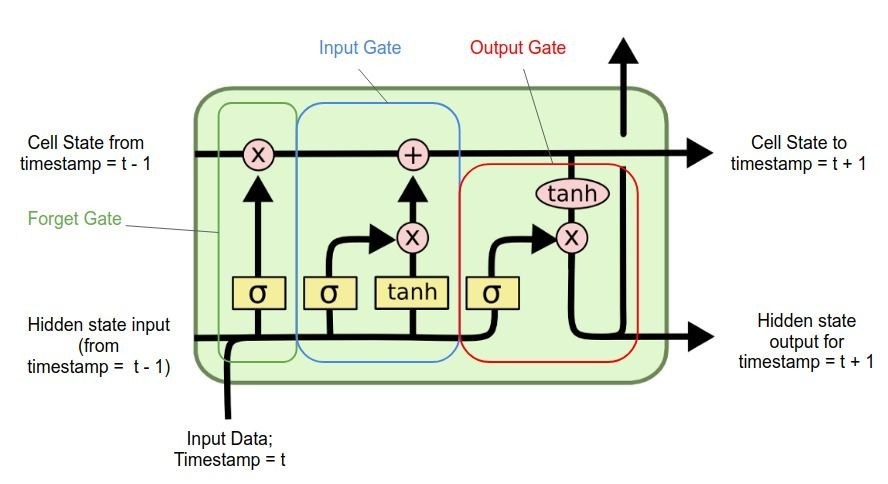

In [31]:
# Write your code here. Add as many boxes as you need.
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import keras

In [32]:
model = Sequential()

In [33]:
model.add(LSTM(100,  activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))

LSTM(100): This specifies an LSTM layer with 100 memory units (or neurons). The number 100 is a hyperparameter that you can adjust based on the complexity of your problem and available computational resources.

activation='relu': This sets the activation function for the LSTM units to Rectified Linear Unit (ReLU). ReLU is a commonly used activation function in neural networks.

input_shape=(X_train.shape[1], X_train.shape[2]): This defines the shape of the input data that will be fed into the LSTM layer. In this case, it's expecting input in the form of (timesteps, features), where timesteps corresponds to the number of past days, and features is the number of features for each day.

return_sequences=True: This parameter is set to True when you want the LSTM layer to return the full sequence of outputs for each timestep, rather than just the output for the last timestep. This is commonly used when stacking multiple LSTM layers.

In [34]:
model.add(LSTM(50, activation='relu'))
model.add(Dense(1, activation='linear'))

Compile the previously defined model specifying **loss function** (`keras.losses`), **optimizer** (`keras.optimizers`) and **evaluation metrics** (`keras.metics`).

Since its regression for loss function we use mean squared error or mean absolute error


In [35]:
# Write your code here. Add as many boxes as you need.
model.compile(loss=keras.losses.MeanSquaredError() , optimizer=keras.optimizers.Adam(), metrics=[keras.metrics.MeanSquaredError(), keras.metrics.MeanAbsoluteError() ])

Train the model on the training set, specifying the **batch size** and **number of epochs** for the training process. Allocate 20% of the samples for **validation**, and ensure that the dataset remains **unshuffled** during training.

In [38]:
# Write your code here. Add as many boxes as you need.
history = model.fit(X_train, Y_train, batch_size = 32, epochs=50, shuffle=False, validation_split=0.2)

Epoch 1/50
33/33 [==============================] - 7s 42ms/step - loss: 589.7609 - mean_squared_error: 589.7609 - mean_absolute_error: 22.4409 - val_loss: 375.7845 - val_mean_squared_error: 375.7845 - val_mean_absolute_error: 18.0492
Epoch 2/50
33/33 [==============================] - 1s 25ms/step - loss: 325.4639 - mean_squared_error: 325.4639 - mean_absolute_error: 16.0704 - val_loss: 107.0778 - val_mean_squared_error: 107.0778 - val_mean_absolute_error: 8.3941
Epoch 3/50
33/33 [==============================] - 1s 22ms/step - loss: 123.3606 - mean_squared_error: 123.3606 - mean_absolute_error: 9.3500 - val_loss: 63.5059 - val_mean_squared_error: 63.5059 - val_mean_absolute_error: 6.6883
Epoch 4/50
33/33 [==============================] - 1s 24ms/step - loss: 71.2845 - mean_squared_error: 71.2845 - mean_absolute_error: 6.9359 - val_loss: 44.1799 - val_mean_squared_error: 44.1799 - val_mean_absolute_error: 5.5124
Epoch 5/50
33/33 [==============================] - 1s 24ms/step - loss

Create a line plot illustrating both the **training** and **validation loss** over the training epochs.

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 50)                30200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 71051 (277.54 KB)
Trainable params: 71051 (277.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


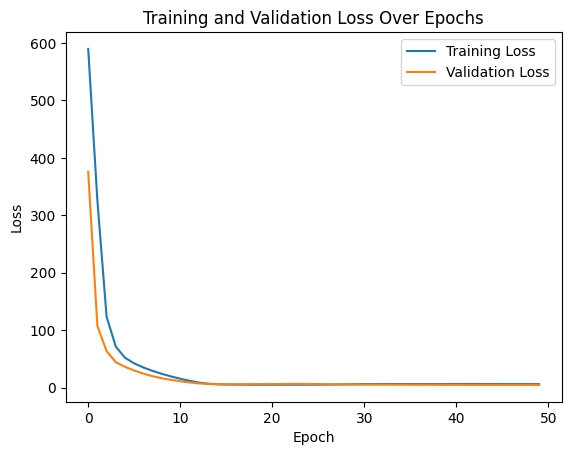

In [41]:
plt.plot(history.history['loss'], label='Training Loss')

# Plot validation loss
plt.plot(history.history['val_loss'], label='Validation Loss')

# Add labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')

# Add legend
plt.legend()

# Show the plot
plt.show()

Use the trained model to make predictions for the test set.

In [42]:
# Write your code here. Add as many boxes as you need.
preds = model.predict(X_test)

5/5 [==============================] - 1s 15ms/step


Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [43]:
# Write your code here. Add as many boxes as you need.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mean_squared_error(preds, Y_test), mean_absolute_error(preds, Y_test), r2_score(preds, Y_test)

(2.1115004008027247, 1.0772564316713478, 0.9364822440108957)

Create a line plot in order to compare the actual and predicted mean temperatures for the test set.

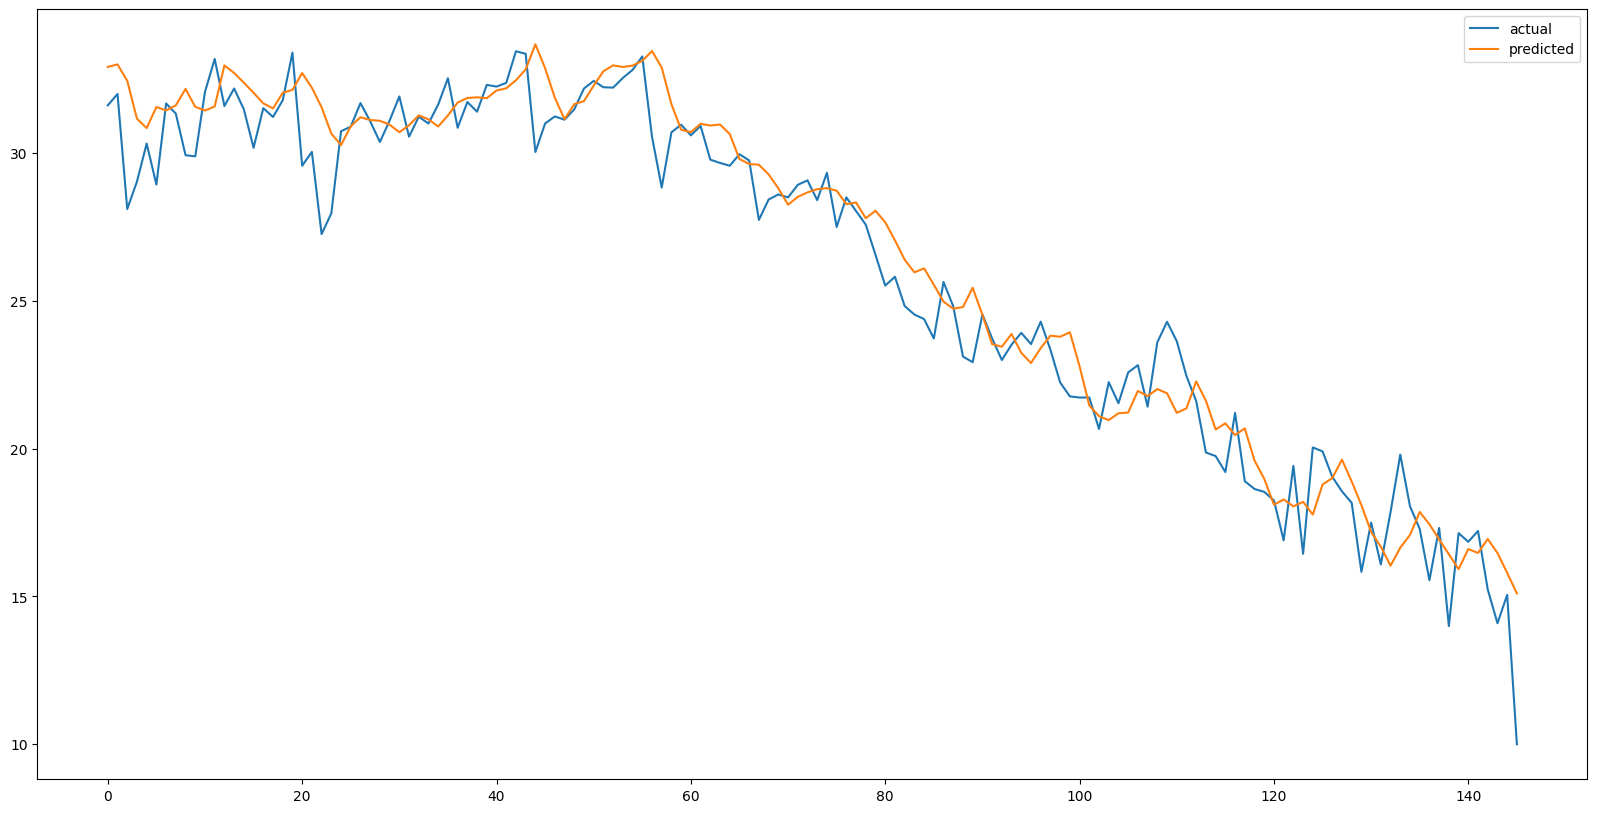

In [44]:
# Write your code here. Add as many boxes as you need.
plt.figure(figsize=(20, 10))
plt.plot(Y_test.values, label='actual')
plt.plot(preds, label='predicted')
plt.legend()
plt.show()

# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to perform a sentiment analysis on a dataset consisting of wine reviews. The dataset contains two attributes: **description** and **points**. The description is a brief text describing the wine and the points which represents a quality metric ranging from 1 to 100. If some wine has at least 90 points it is considered **exceptional**. Your task involves predicting if some wine is exceptional based on its review.

The greater part of the code for the solution is already given. You need to define a tokenizer to tokenize the given texts and a deep neural network model that will be used for the classification task at hand. Fill in only the missing code blocks.

## Requirements

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.models import Sequential
import keras
from keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, LSTM, Flatten
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Downloading the Wine Reviews Dataset

In [25]:
!gdown 1fz9449M9Owofy6CYrKzkGwXKesI32B8u

Traceback (most recent call last):
  File "/usr/local/bin/gdown", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/gdown/cli.py", line 151, in main
    filename = download(
  File "/usr/local/lib/python3.10/dist-packages/gdown/download.py", line 203, in download
    filename_from_url = m.groups()[0]
AttributeError: 'NoneType' object has no attribute 'groups'


## Exploring the Climate Dataset

Load the dataset into a `pandas` data frame.

In [26]:
df = pd.read_csv('/content/wine-reviews.csv')

In [27]:
df.head(12)

,description,points
0,"Aromas include tropical fruit, broom, brimston...",87.0
1,"This is ripe and fruity, a wine that is smooth...",87.0
2,"Tart and snappy, the flavors of lime flesh and...",87.0
3,"Pineapple rind, lemon pith and orange blossom ...",87.0
4,"Much like the regular bottling from 2012, this...",87.0
5,Blackberry and raspberry aromas show a typical...,87.0
6,"Here's a bright, informal red that opens with ...",87.0
7,This dry and restrained wine offers spice in p...,87.0
8,Savory dried thyme notes accent sunnier flavor...,87.0
9,This has great depth of flavor with its fresh ...,87.0


## Feature Extraction

Extract the feature `exceptional` for each wine review.

In [28]:
df['exceptional'] = df['points'].apply(lambda elem: 1 if elem >= 90 else 0)

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [29]:
X, y = df['description'], df['exceptional']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Text Tokenization

Use tokenizer to convert raw text into a sequence of tokens.

In [31]:
# Write your code here. Add as many boxes as you need.
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()

In [32]:
tokenizer.fit_on_texts(X_train.values)


the context of the Tokenizer in Keras, each token typically represents a word. The Tokenizer is designed to work with natural language text data, where tokens are often words or subword units.

we use fit_on_texts to assign a integer to each token

In [33]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

After fitting the tokenizer, you can use it to convert text data into sequences of integers.
The texts_to_sequences method transforms each text into a list of integers based on the vocabulary learned during fitting.

## Padding
Pad each sequence to maximum length of 16.

The pad_sequences function in Keras is used to ensure that all sequences in a given list have the same length.

In [34]:
# Write your code here. Add as many boxes as you need.
from keras.preprocessing.sequence import pad_sequences


In [35]:
X_train_padded = pad_sequences(X_train_seq, maxlen=16)
X_test_padded = pad_sequences(X_test_seq, maxlen=16)

## Deep Neural Network

Define Deep Neural Network model to predict if a specific wine is exceptional or not based on the tokenized and padded wine reviews.

points coloumn has been renamed exceptional where if a wine has score over 90 it has 1 otherwise 0


In [36]:
# Write your code here. Add as many boxes as you need.
from keras.models import Sequential
import keras
from keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, LSTM, Flatten, Dropout
from sklearn.metrics import confusion_matrix, classification_report

In [37]:
model = Sequential()

embedded is the first layer to start when working with text


In [38]:
# Calculate vocabulary size
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

In [39]:
model.add(Embedding(input_dim=vocab_size, output_dim=32, input_length=16))


In [40]:
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer for regularization
model.add(Dense(1, activation='sigmoid'))

Compile the previously defined model specifying loss function, optimizer and evaluation metrics.

In [41]:
# Write your code here. Add as many boxes as you need.
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


Fit the compiled model on the train set specifying the percent for

validation, batch_size, and number of epochs.

In [43]:
history = model.fit(X_train_padded, y_train, validation_split=0.2, batch_size=128, epochs=10)


Epoch 1/10
650/650 [==============================] - 54s 84ms/step - loss: 0.4974 - accuracy: 0.7561 - val_loss: 0.4544 - val_accuracy: 0.7812
Epoch 2/10
650/650 [==============================] - 51s 78ms/step - loss: 0.4289 - accuracy: 0.8005 - val_loss: 0.4478 - val_accuracy: 0.7847
Epoch 3/10
650/650 [==============================] - 52s 80ms/step - loss: 0.4053 - accuracy: 0.8116 - val_loss: 0.4566 - val_accuracy: 0.7817
Epoch 4/10
650/650 [==============================] - 49s 76ms/step - loss: 0.3862 - accuracy: 0.8216 - val_loss: 0.4659 - val_accuracy: 0.7808
Epoch 5/10
650/650 [==============================] - 50s 76ms/step - loss: 0.3661 - accuracy: 0.8304 - val_loss: 0.4730 - val_accuracy: 0.7788
Epoch 6/10
650/650 [==============================] - 50s 77ms/step - loss: 0.3479 - accuracy: 0.8380 - val_loss: 0.4919 - val_accuracy: 0.7762
Epoch 7/10
650/650 [==============================] - 51s 79ms/step - loss: 0.3329 - accuracy: 0.8450 - val_loss: 0.5473 - val_accuracy:

Create a line plot illustrating both the **training** and **validation loss** over the training epochs.

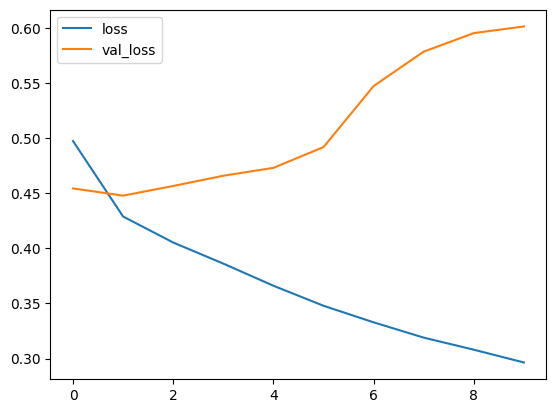

In [46]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

Use the trained model to make predictions for the test set.

Overfitting


In [50]:
print(X_test.dtypes)


AttributeError: 'numpy.ndarray' object has no attribute 'dtypes'

In [48]:
print(X_test.apply(type).value_counts())


<class 'str'>    25995
Name: description, dtype: int64


In [51]:
y_pred = model.predict(X_test_padded)

813/813 [==============================] - 9s 9ms/step


Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [52]:
print(classification_report(y_test, np.round(y_pred)))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82     16218
           1       0.71      0.67      0.69      9777

    accuracy                           0.78     25995
   macro avg       0.76      0.75      0.76     25995
weighted avg       0.77      0.78      0.77     25995

